## Importing libaryies

In [64]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


## Making data a non-linear data using numpy

In [73]:
x = 6*np.random.rand(200,1)-3
y = 0.8 * x**2 + np.random.randn(200,1)

In [74]:
print(len(x),len(y))

200 200


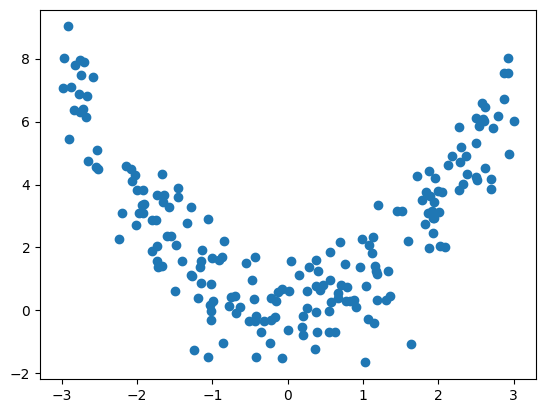

In [75]:
plt.scatter(x,y);

In [76]:
### spliting data into training and testing 

In [77]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [78]:
x_train.shape

(160, 1)

# Linear Regression

In [79]:
lr = LinearRegression()

In [80]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [81]:
print(f"your coef from linear regression is {lr.coef_}")
print(f"your intercept from linear regression is {lr.intercept_}")



your coef from linear regression is [[0.08877273]]
your intercept from linear regression is [2.59869481]


In [82]:
y_pred_test_lr = lr.predict(x_test)

In [83]:
print(f"your r2 score by LR is {r2_score(y_pred_test_lr,y_test)}")

your r2 score by LR is -360.18327111101064


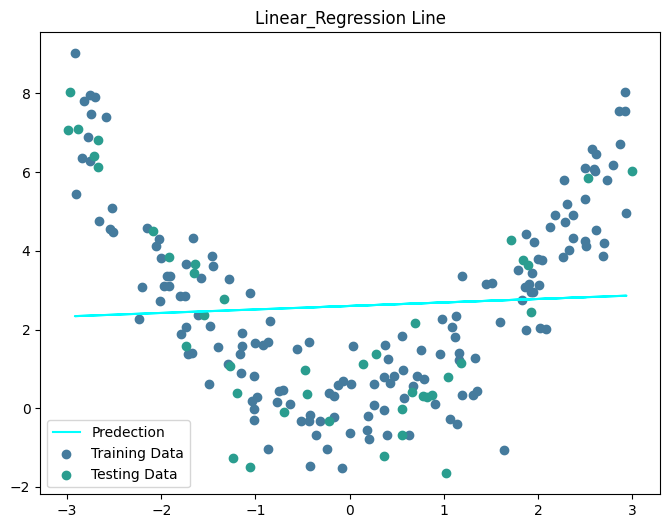

In [84]:
plt.figure(figsize=(8,6))
plt.plot(x_train,lr.predict(x_train),color='cyan',label='Predection')
plt.scatter(x_train,y_train,color='#457B9D',label='Training Data')
plt.scatter(x_test,y_test,color='#2A9D8F',label='Testing Data')
plt.title('Linear_Regression Line')
plt.legend();

# Polynomial

In [93]:
poly = PolynomialFeatures(degree=3)

In [109]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [110]:
x_test_poly.shape

(40, 4)

In [96]:
print(x_train[0])
print(x_train_poly[0])

[2.50389534]
[ 1.          2.50389534  6.26949186 15.69815145]


In [101]:
plr = LinearRegression()

In [102]:
plr.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [104]:
print(plr.coef_)
print(plr.intercept_)

[[ 0.          0.05293362  0.81948891 -0.02083921]]
[0.16258577]


In [112]:
y_pred_train_plr = plr.predict(x_train_poly)

In [105]:
y_pred_test_plr = plr.predict(x_test_poly)

In [106]:
print(f"your r2 score by ploynomial Linear Regression is {r2_score(y_test,y_pred_test_plr)}")

your r2 score by ploynomial Linear Regression is 0.8433689932205455


In [117]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = plr.predict(x_new_poly)

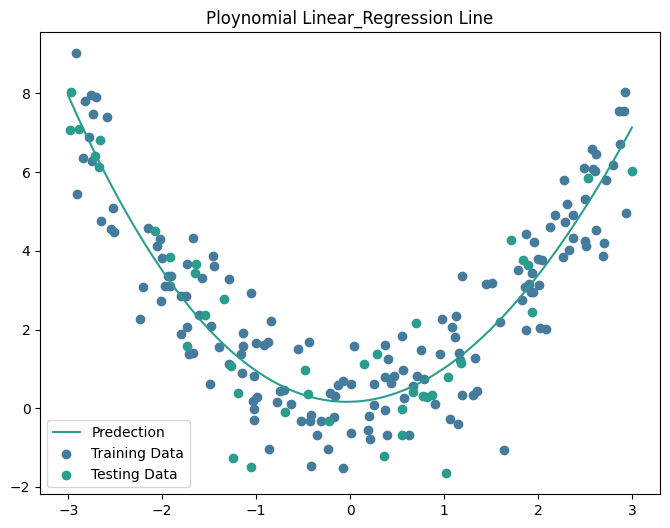

In [119]:
plt.figure(figsize=(8,6))
plt.plot(x_new,y_new,color='#2A9D8F',label='Predection')
plt.scatter(x_train,y_train,color='#457B9D',label='Training Data')
plt.scatter(x_test,y_test,color='#2A9D8F',label='Testing Data')
plt.title('Ploynomial Linear_Regression Line')
plt.legend();